In [2]:
import pandas as pd
import numpy as np
import statistics as sta
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
dataset = pd.read_csv('dataset.csv')
dataset.info()
dataset[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17751 entries, 0 to 17750
Data columns (total 7 columns):
Date           17751 non-null int64
Country        17751 non-null object
CountryCode    17751 non-null object
CountryCat     17751 non-null object
HRTopic        17751 non-null object
AvgTone        17751 non-null float64
SourceURL      17751 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 624.1+ KB


,Date,Country,CountryCode,CountryCat,HRTopic,AvgTone,SourceURL
0,20180101,Pakistan,PAK,developing,accuse,-2.155887,http://www.theweek.in/theweek/more/mistreatmen...
1,20180101,Europe,EUR,developed,demand rights,1.775523,http://www.americasquarterly.org/content/two-t...
2,20180101,Cuba,CUB,developing,demand rights,-3.181336,http://www.ecuadorinmediato.com/index.php?modu...
3,20180101,United States,USA,developed,demand rights,1.038062,http://www.bryantimes.com/editorial/a-roundup-...
4,20180101,Occupied Palestinian Territory,PSE,developed,demand rights,-1.158301,http://www.ziarelive.ro/stiri/autoritatile-pal...


In [68]:
dataset.Date = pd.to_datetime(dataset.Date , format='%Y%m%d', errors='ignore')
dataset

,Date,Country,CountryCode,CountryCat,HRTopic,AvgTone,SourceURL
0,2018-01-01,Pakistan,PAK,developing,accuse,-2.155887,http://www.theweek.in/theweek/more/mistreatmen...
1,2018-01-01,Europe,EUR,developed,demand rights,1.775523,http://www.americasquarterly.org/content/two-t...
2,2018-01-01,Cuba,CUB,developing,demand rights,-3.181336,http://www.ecuadorinmediato.com/index.php?modu...
3,2018-01-01,United States,USA,developed,demand rights,1.038062,http://www.bryantimes.com/editorial/a-roundup-...
4,2018-01-01,Occupied Palestinian Territory,PSE,developed,demand rights,-1.158301,http://www.ziarelive.ro/stiri/autoritatile-pal...
5,2018-01-01,Japan,JPN,developed,demand rights,-5.749293,http://www.scmp.com/week-asia/geopolitics/arti...
6,2018-01-01,South Sudan,SSD,developing,demand rights,-4.931507,https://radiotamazuj.org/en/news/article/south...
7,2018-01-01,France,FRA,developed,demand rights,-6.127451,http://www.khmertimeskh.com/5098996/rainsy-fin...
8,2018-01-01,Libya,LBY,developing,demand rights,-4.020101,http://www.al-watan.com/news-details/id/114978
9,2018-01-01,United States,USA,developed,demand rights,1.128936,http://www.kansas.com/news/business/article192...


In [4]:
# dataset.CountryCat = dataset.CountryCat.astype('category')
# dataset.Country = dataset.Country.astype('category')
# dataset.CountryCode = dataset.CountryCode.astype('category')

In [7]:
#ada berapa negara?
#len(dataset.Country.cat.categories)

In [8]:
descCountry = dataset.groupby('CountryCode').count()[['Country','AvgTone']]
descCountry.sort_values(by=['Country'],ascending = False)

,Country,AvgTone
CountryCode,,
USA,3414,3414
GBR,939,939
ISR,813,813
PSE,751,751
RUS,721,721
TUR,490,490
IRN,378,378
CHN,376,376
UKR,375,375


In [9]:
TopTen = dataset[(dataset.CountryCode == 'USA')|(dataset.CountryCode == 'ISR')|
                 (dataset.CountryCode == 'GBR')|(dataset.CountryCode == 'PSE')|
                 (dataset.CountryCode == 'RUS')|(dataset.CountryCode == 'TUR')|
                 (dataset.CountryCode == 'IRN')|(dataset.CountryCode == 'CHN')|
                 (dataset.CountryCode == 'UKR')|(dataset.CountryCode == 'ESP')]
TopTen.to_csv('data/TopTen.csv', index=False)
TopTen = pd.read_csv('data/TopTen.csv')
TopTenListCode = TopTen.CountryCode.values
TopTenListLabel = TopTen.Country.values

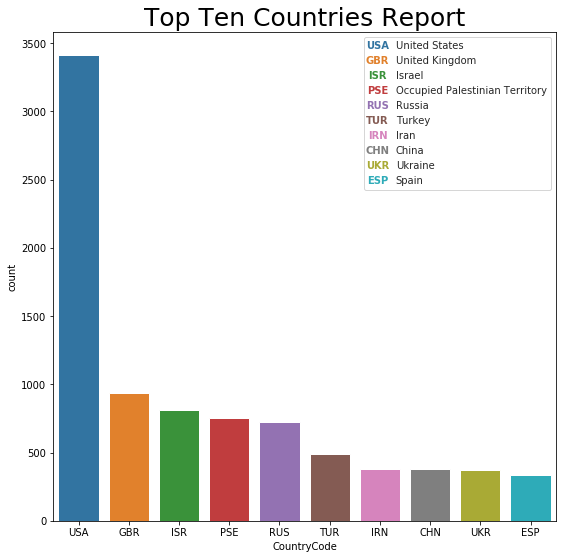

In [10]:
f, ax = plt.subplots(figsize=(9,9))
sns.set_style('whitegrid')
tes = sns.countplot(x="CountryCode", data=TopTen, order = TopTen['CountryCode'].value_counts().index)
plt.title("Top Ten Countries Report", fontsize=25)

from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]
    
handltext = TopTenListCode
labels = TopTenListLabel

t = tes.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)]

ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 

plt.show()

In [11]:
# sns.set_style('whitegrid')
# sns2 = sns.lmplot(data=dataset, x='Date',y='AvgTone', hue="HRTopic", fit_reg=False, height=8, scatter_kws={'s':200},aspect=2)

dataset.groupby('HRTopic').count()['SourceURL']

HRTopic
accuse                    2365
demand rights            11699
demo                        71
investigation             1097
reject request rights     2519
Name: SourceURL, dtype: int64

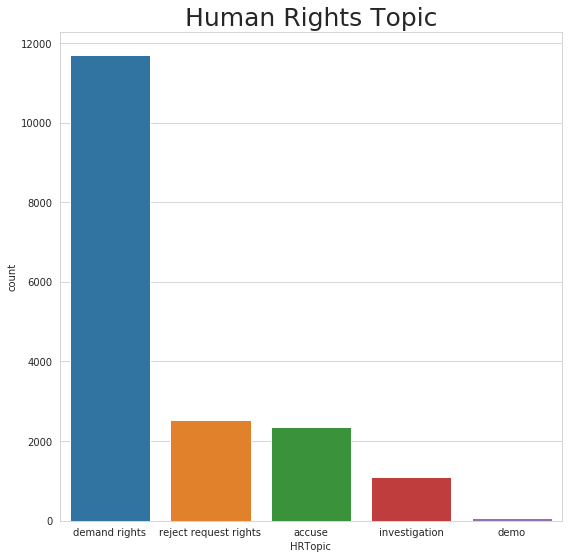

In [12]:
f, ax = plt.subplots(figsize=(9,9))
sns.set_style('whitegrid')
tes = sns.countplot(x="HRTopic", data=dataset, order = dataset['HRTopic'].value_counts().index)
tes = plt.title("Human Rights Topic", fontsize=25)

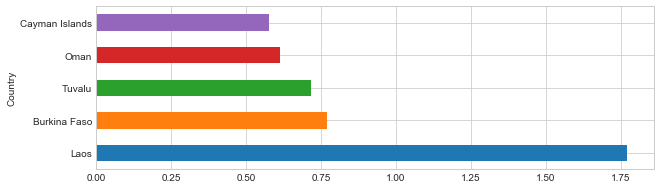

In [57]:
desc_tone = dataset.groupby(by = ["Country"]). AvgTone.mean()
# rank_tone = desc_tone.sort_values(by=['AvgTone'],ascending = False)
desc_tone = desc_tone.sort_values(ascending=False)
top5 = desc_tone[:5]
bottom5 = desc_tone[-5:]
top5.plot(kind = 'barh', y  = "AvgTone", x="Country", figsize = (10,3))

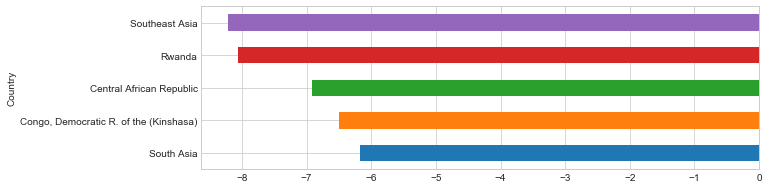

In [58]:
bottom5.plot(kind = 'barh', y  = "AvgTone", x="Country", figsize = (10,3))

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17751 entries, 0 to 17750
Data columns (total 7 columns):
Date           17751 non-null int64
Country        17751 non-null object
CountryCode    17751 non-null object
CountryCat     17751 non-null object
HRTopic        17751 non-null object
AvgTone        17751 non-null float64
SourceURL      17751 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 970.8+ KB


In [69]:
DRdata = dataset[dataset.HRTopic=='demand rights']
DRtop5 = DRdata.groupby('CountryCode').count()[['SourceURL']]
DRtop5.sort_values(by=['SourceURL'],ascending = False)

,SourceURL
CountryCode,
USA,2115
PSE,606
GBR,604
ISR,459
RUS,374
UKR,305
ESP,289
MEX,288
DEU,269


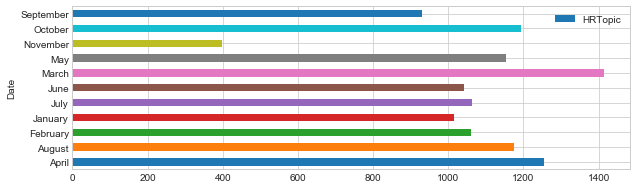

In [76]:
dateGroup = DRdata.groupby(dataset.Date.dt.strftime('%B')).count()
dateGroup.index
dateGroup.plot(kind = 'barh', y  = "HRTopic", x= dateGroup.index, figsize = (10,3))

In [60]:
(1255+1174+1061+1062+1041+1414+1153+1193+931)/10

1028.4

In [11]:
positif = dataset.loc[dataset['AvgTone'] >= 0]
positif.count()

Date           2662
Country        2662
CountryCode    2662
CountryCat     2662
HRTopic        2662
AvgTone        2662
SourceURL      2662
dtype: int64

In [12]:
negatif = dataset.loc[dataset['AvgTone'] <= 0]
negatif.count()

Date           15403
Country        15403
CountryCode    15403
CountryCat     15403
HRTopic        15403
AvgTone        15403
SourceURL      15403
dtype: int64

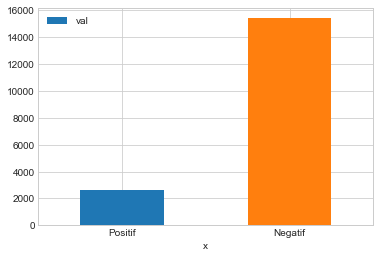

In [21]:
data_tone = pd.DataFrame({'x':['Positif', 'Negatif'], 'val':[2662, 15403]})
ax = data_tone.plot.bar(x='x', y='val', rot=0)

In [ ]:
print('tes')

# JUMLAH DATA PERKATEGORI TOP

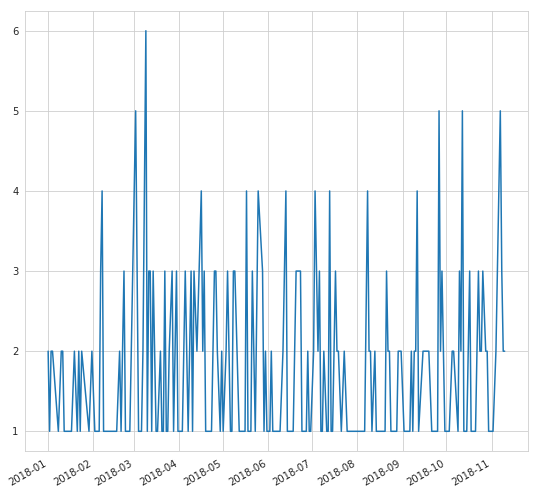

In [42]:
f, ax = plt.subplots(figsize=(9,9))


l = list(DRdata.Date.values)
n = np.random.rand(len(l))
a = np.random.choice(l, p=n/n.sum(),size=400)

s = pd.Series(a)
s.value_counts()[:].plot()

plt.show()